<a href="https://colab.research.google.com/github/Lakshay2013/Lakshay2013/blob/main/MetaboMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/nutrients_csvfile.csv"
data = pd.read_csv(file_path)

# Display column names
print("Column names in dataset:", data.columns)

# Convert 'Calories' and other numeric columns to proper data types
numeric_cols = ['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Converts non-numeric values to NaN

# Check for missing values again
print("\nMissing values after conversion:")
print(data.isnull().sum())

# Fill missing values only for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data.drop(columns=['Calories'])
y = data['Calories']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData preprocessing complete. Ready for model training!")




Column names in dataset: Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

Missing values after conversion:
Food          0
Measure       0
Grams         1
Calories      5
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

Data preprocessing complete. Ready for model training!


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 36.869527815468125
Mean Squared Error: 5584.083912283377


                         Feature  Importance
5                          Carbs    0.421214
2                            Fat    0.212531
3                        Sat.Fat    0.157872
1                        Protein    0.066696
4                          Fiber    0.028985
..                           ...         ...
86   Food_Cream or half-and-half    0.000000
31              Food_Blueberries    0.000000
30             Food_Blackberries    0.000000
245         Food_Roasted chicken    0.000000
104       Food_Fish sticks fried    0.000000

[409 rows x 2 columns]


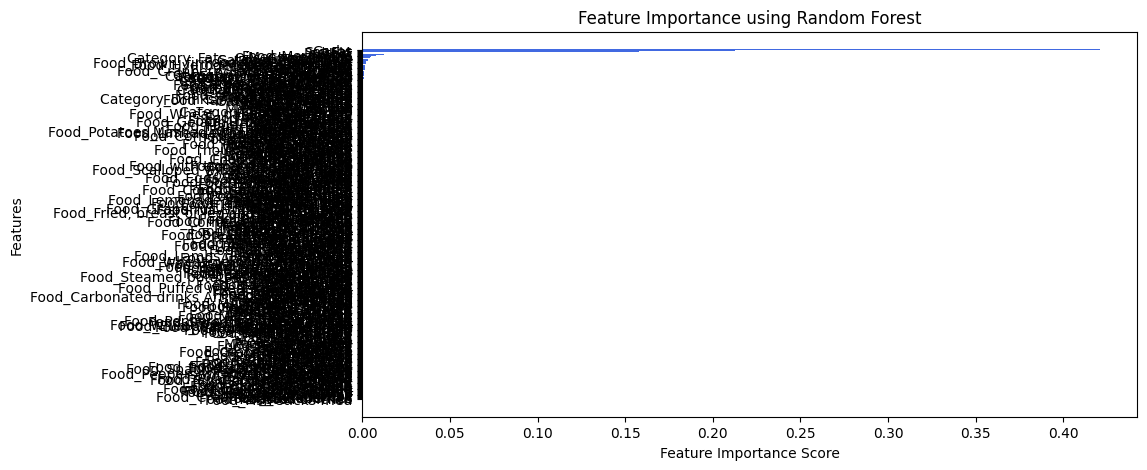

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create DataFrame to display importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display top features
print(importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # Flip to show the most important feature on top
plt.show()


In [11]:
import pickle

# Save the trained model to a file
with open("metabomatrix_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as 'metabomatrix_model.pkl'")


Model saved successfully as 'metabomatrix_model.pkl'


In [12]:
import pickle

# Load the saved model
with open("metabomatrix_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred = loaded_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)  # R² Score (Accuracy)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error

# Display results
print(f"Model Accuracy (R² Score): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Model Accuracy (R² Score): 0.7747
Mean Absolute Error (MAE): 36.87
Root Mean Squared Error (RMSE): 74.73
